In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [2]:
# include_top = True와 비교
model1 = VGG16(weights='imagenet', include_top=False)
model1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [1]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

In [2]:
img = Image.open('cat.jpg')
img.size

(300, 280)

### Image cropping
여기서는 center cropping 방법을 사용해서 정사각형으로 만든다.<br>

280 275 2 0 275


(275, 275)

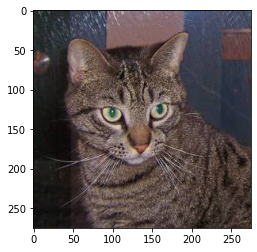

In [5]:
w, h = img.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
print(w, h, x, y, s)
img = img.crop((x, y, x+s, y+s))
# 4-tuple defining the left, upper, right, and lower pixel coordinate
plt.imshow(np.asarray(img))
img.size

그 다음에 해야 하는 것은 VGG16이 입력받는 크기로 이미지를 resize (확대 또는 축소) 해주기 <br>
이를 위해 먼저 입력받는 이미지의 크기를 아래와 같이 확인

In [6]:
model.layers[0].input_shape # 224x224의 칼라이미지를 입력 받는다. 

[(None, 224, 224, 3)]

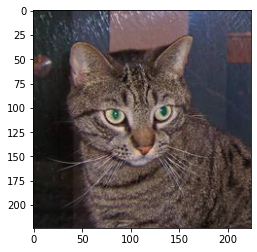

In [11]:
target_size = 224
img = img.resize((target_size, target_size)) # resize from 280x280 to 224x224
imshow(np.asarray(img))

이미지 파일을 numpy의 array type으로 변환하는 것이 필요 <br>
아래와 같이 image 모듈에서 제공하는 img_to_array() 함수를 사용<br>
이는 CNN 모형에 입력되는 형태는 array 이기 때문

In [10]:
np_img = image.img_to_array(img)
np_img.shape

(280, 270, 3)

4D array 형태로 차원을 확장해 주는 것이 필요 <br>
원래의 모형은 3차원의 이미지를 여러개 입력 받기 때문 (즉, 4차원 array로 데이터가 구성되어 있음)

In [11]:
img_batch = np.expand_dims(np_img, axis=0)
img_batch.shape

(1, 280, 270, 3)

In [12]:
img_batch

array([[[[ 38.,  41.,  46.],
         [ 30.,  34.,  37.],
         [ 41.,  45.,  46.],
         ...,
         [ 95., 102., 128.],
         [ 85.,  92., 118.],
         [ 54.,  61.,  87.]],

        [[ 39.,  42.,  47.],
         [ 29.,  33.,  36.],
         [ 36.,  40.,  41.],
         ...,
         [ 91.,  98., 124.],
         [ 84.,  91., 117.],
         [ 63.,  70.,  96.]],

        [[ 46.,  49.,  54.],
         [ 34.,  38.,  41.],
         [ 34.,  38.,  39.],
         ...,
         [ 86.,  93., 119.],
         [ 85.,  92., 118.],
         [ 77.,  84., 110.]],

        ...,

        [[ 24.,  22.,  23.],
         [ 24.,  22.,  23.],
         [ 24.,  22.,  23.],
         ...,
         [ 69.,  52.,  42.],
         [ 71.,  54.,  44.],
         [ 75.,  59.,  46.]],

        [[ 25.,  23.,  24.],
         [ 26.,  24.,  25.],
         [ 25.,  23.,  24.],
         ...,
         [ 63.,  46.,  36.],
         [ 68.,  51.,  41.],
         [ 72.,  56.,  43.]],

        [[ 26.,  24.,  25.],
       

Feature normalization 필요 <br>
- img_batch의 각 원소값은 0 ~ 255 사이의 숫자로 구성 
- 학습의 속도와 모형의 성능을 높이기 위해서 normalization 필요
- 이를 위해 preprocess_input() 사용
- 모형 마다 preprocess_input() 함수의 역할의 다름
- VGG16의 경우, 원래의 값들이 0을 기준으로 centering

In [13]:
pre_processed = preprocess_input(img_batch)

In [15]:
pre_processed

array([[[[-57.939003, -75.779   , -85.68    ],
         [-66.939   , -82.779   , -93.68    ],
         [-57.939003, -71.779   , -82.68    ],
         ...,
         [ 24.060997, -14.778999, -28.68    ],
         [ 14.060997, -24.779   , -38.68    ],
         [-16.939003, -55.779   , -69.68    ]],

        [[-56.939003, -74.779   , -84.68    ],
         [-67.939   , -83.779   , -94.68    ],
         [-62.939003, -76.779   , -87.68    ],
         ...,
         [ 20.060997, -18.779   , -32.68    ],
         [ 13.060997, -25.779   , -39.68    ],
         [ -7.939003, -46.779   , -60.68    ]],

        [[-49.939003, -67.779   , -77.68    ],
         [-62.939003, -78.779   , -89.68    ],
         [-64.939   , -78.779   , -89.68    ],
         ...,
         [ 15.060997, -23.779   , -37.68    ],
         [ 14.060997, -24.779   , -38.68    ],
         [  6.060997, -32.779   , -46.68    ]],

        ...,

        [[-80.939   , -94.779   , -99.68    ],
         [-80.939   , -94.779   , -99.68    ]

예측하기
- predict() 함수를 이용
- 별도의 학습이 필요 없음: Why? 이미 학습이 된 가중치를 사용하기 때문

In [16]:
features = model.predict(pre_processed)

In [17]:
features.shape
# 종속변수가 취할 수 있는 값의 수 = 1000

(1, 1000)

In [18]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
features
# 각 원소의 값은 종속변수가 각 값을 갖을 확률을 의미

array([[0.0000047877, 0.0000077395, 0.0000042265, 0.000011731 ,
        0.0000015324, 0.0000072357, 0.0000014366, 0.0000165329,
        0.0000065931, 0.0000011079, 0.0000008225, 0.0000009066,
        0.0000074678, 0.0000065455, 0.0000007181, 0.0000255142,
        0.0000023048, 0.0000061392, 0.0000053621, 0.0000004745,
        0.0000046431, 0.0000032404, 0.0000011678, 0.0000012272,
        0.0000655124, 0.0000009225, 0.0000012322, 0.0000013535,
        0.0000013048, 0.0000013484, 0.0000024446, 0.0000025291,
        0.0000007106, 0.0000004301, 0.0000013563, 0.0000063805,
        0.0000067168, 0.0000107596, 0.0000030655, 0.0000245604,
        0.000005238 , 0.000004659 , 0.0000016222, 0.0000065013,
        0.0000174995, 0.0000021413, 0.0000406203, 0.0000055787,
        0.0000024846, 0.0000042035, 0.0000065361, 0.0000252316,
        0.000002269 , 0.0000017535, 0.0000072308, 0.0000037466,
        0.000002483 , 0.0000010749, 0.0000027941, 0.000005408 ,
        0.0000042294, 0.0000011135, 0.00

In [19]:
np.max(features)

0.48998845

확률이 높은 상위 5개의 클래스 정보만 출력

In [20]:
decode_predictions(features, top=5)

[[('n02123045', 'tabby', 0.48998845),
  ('n02123159', 'tiger_cat', 0.31324884),
  ('n02124075', 'Egyptian_cat', 0.09519073),
  ('n03223299', 'doormat', 0.0076525398),
  ('n02971356', 'carton', 0.0073800706)]]

### Dog 이미지 분류하기

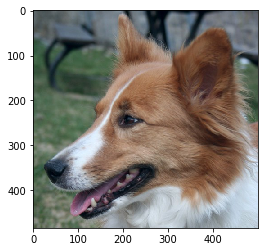

In [18]:
img_dog = Image.open('dog.jpg')
imshow(np.asarray(img_dog))

500 484 8 0 484


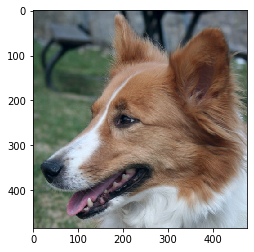

In [19]:
w, h = img_dog.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
print(w, h, x, y, s)
img_dog = img_dog.crop((x, y, x+s, y+s))
imshow(np.asarray(img_dog))

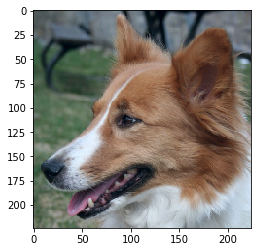

In [20]:
target_size = 224
img_dog = img_dog.resize((target_size, target_size))
imshow(np.asarray(img_dog))

In [23]:
np_img = image.img_to_array(img_dog)
img_batch = np.expand_dims(np_img, axis=0)
pre_processed = preprocess_input(img_batch)
features_dog = model.predict(pre_processed)

In [24]:
np.max(features_dog)

0.62924427

In [25]:
decode_predictions(features_dog, top=5)

[[('n02106030', 'collie', 0.62924427),
  ('n02105855', 'Shetland_sheepdog', 0.26820856),
  ('n02113023', 'Pembroke', 0.06076171),
  ('n02106166', 'Border_collie', 0.020168487),
  ('n02113186', 'Cardigan', 0.013935505)]]

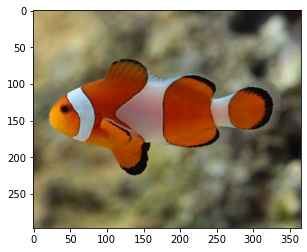

In [21]:
img_nemo = Image.open('nemo.jpg')
imshow(np.asarray(img_nemo))

365 297 34 0 297


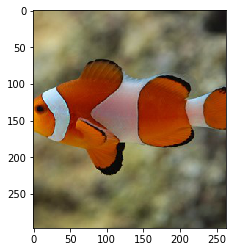

In [28]:
w, h = img_nemo.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
print(w, h, x, y, s)
img_nemo = img_nemo.crop((x, y, x+s, y+s))
imshow(np.asarray(img_nemo))

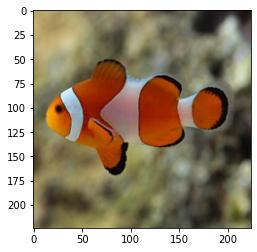

In [22]:
target_size = 224
img_nemo = img_nemo.resize((target_size, target_size))
imshow(np.asarray(img_nemo))

In [23]:
np_img = image.img_to_array(img_nemo)
img_batch = np.expand_dims(np_img, axis=0)
pre_processed = preprocess_input(img_batch)
features_nemo = model.predict(pre_processed)

In [24]:
decode_predictions(features_nemo, top=5)

[[('n02607072', 'anemone_fish', 0.9926664),
  ('n01950731', 'sea_slug', 0.003914506),
  ('n09256479', 'coral_reef', 0.0016710573),
  ('n01914609', 'sea_anemone', 0.0013579098),
  ('n01924916', 'flatworm', 0.00025680294)]]